# 서울시에서 일어나는 범죄와 체감 안전도
: 강남3구 안전도가 얼마나 되는지 또한 서울시 전체의 안전도가 얼마나 되는지 확인

In [321]:
import pandas as pd
import json

In [322]:
# 범죄율 데이터 가져오기
crime_anal_police =  pd.read_csv('../Data/crime_in_Seoul.csv' , encoding = 'cp949' ) # 한글 인코딩 utf-8 / enc-kr / cp949 (cp949는 enc-kr의 확장버전)
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [323]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [324]:
crime_anal_police[crime_anal_police['관서명']=='강서서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
19,강서서,7,8,13,13,262,191,"2,096","1,260","3,207","2,718"


In [325]:
# 주소 데이터 가져오기
police_address = pd.read_csv('../Data/SeoulPoliceAddress.csv')
police_address.head()

,경찰관서,전화번호,FAX,주소
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16


In [326]:
station_name = list('서울' + crime_anal_police['관서명'].str[:-1] + '경찰서')
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [327]:
# for 문 사용하는 방법
station_name = []
for name in crime_anal_police['관서명']:
    # print('서울' + name[:-1] + "경찰서" )
    station_name.append('서울' + name[:-1] + "경찰서" )

station_name[:10]

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서']

In [328]:
# 경찰서 갯수 확인
len(station_name)

31

In [329]:
len(police_address)
# 갯수 일치

31

In [330]:
police_address['lng'] = 0 # 경도
police_address['lat'] = 0 # 위도

In [331]:
# top 10 위도 경도
# 네이버 API사용
# url 경로만 바꿔서 사용하면 될것임 
import urllib.request

# https://console.ncloud.com/naver-service/application 에서 클라이언트 아이디, 시크릿 값 가져오기 
client_id = "-"
client_secret = "-"

for i , name in enumerate(police_address['주소']):
    try:
        encText = urllib.parse.quote(name)
        url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
        request = urllib.request.Request(url)
        request.add_header("X-NCP-APIGW-API-KEY-ID", client_id)
        request.add_header("X-NCP-APIGW-API-KEY", client_secret)

        response = urllib.request.urlopen(request)
        rescode = response.getcode()

        if rescode == 200:
            response_body = response.read()
            enText = response_body.decode('utf-8')
        else:
            print("Error Code:" + rescode)

        data = json.loads(enText)

        police_address['lng'].iloc[i] = data['addresses'][0]['x']
        police_address['lat'].iloc[i] = data['addresses'][0]['y']
    except:
        pass


In [332]:
sum(police_address['lng']==0) # 0 
police_address.head(10)

,경찰관서,전화번호,FAX,주소,lng,lat
0,서울중부경찰서,(02)2273-4400,(02)2275-3009,서울 중구 수표로 27,0,0
1,서울종로경찰서,(02)3701-4324,(02)3701-4223,서울 종로구 율곡로 46,0,0
2,서울남대문경찰서,(02)2096-8324,(02)2096-8337,서울 중구 한강대로 410,0,0
3,서울서대문경찰서,(02)335-8192,(02)335-8189,서울 서대문구 통일로 113,0,0
4,서울혜화경찰서,(02)762-4400,(02)3158-7133,서울 종로구 창경궁로 112-16,0,0
5,서울용산경찰서,(02)2198-0267,(02)2198-0325,서울 용산구 원효로89길 24,0,0
6,서울성북경찰서,(02)920-1324,(02)920-1661,서울 성북구 보문로 170,0,0
7,서울동대문경찰서,(02)3295-0110,(02)961-4849,서울 동대문구 약령시로21길 29,0,0
8,서울마포경찰서,(02)3149-6324,(02)3149-6327,서울 마포구 마포대로 183,0,0
9,서울영등포경찰서,(02)2118-9324,(02)2118-9461,서울시 영등포구 국회대로 608,0,0


In [333]:
police_address.to_csv('../Data/SeoulPoliceAddress_latlng.csv' , index = False)

In [334]:
# 2개의 File에 경찰관서가 동일한 이름인지 확인
len(station_name == police_address['경찰관서']) # 글자와 순서가 동일하다

31

In [335]:
# 경찰서 주소 데이터에서 구 뽑아내기
# for 문 사용 1
gulist = []
for i in range(len(police_address)):
    gulist.append(police_address.주소.str.split(' ')[i][1])

gulist

# 경찰서 구 데이터 범죄율 데이터에 추가하기
crime_anal_police['구별'] = gulist
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [336]:
# 경찰서 주소 데이터에서 구 뽑아내기
# for 문 사용 2
[region.split()[1] for region in police_address['주소']]

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '관악구',
 '중랑구',
 '강남구',
 '관악구',
 '양천구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [337]:
# 경찰서 주소 데이터에서 구 뽑아내기
# 주소중 2번째 단어의 끝에 '구' 이름만 출력하기
gu_name = []
for name in police_address['주소']:
    temp = name.split() # 주소를 공백 기준으로 나누기
    temp_gu =  [gu for gu in temp if gu[-1] == '구'][0] # 구로 끝나는 문자열만  temp_gu에 저장, [0]를 안해주면 리스트로 들어가게 된다. [0]을 해줌으로서 데이터만 뽑아오는것
    gu_name.append(temp_gu)

crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [338]:
len(gu_name)

31

In [339]:
# 리스트에서 중복값 제거하고 갯수 볼 때 
# 리스트는 unique는 사용이 불가하다
len(set(gu_name))
# 25개 구 , 2개의 구에는 경찰서가 없나? 

23

In [340]:
# 관서명과 구별 이름 확인
crime_anal_police[['관서명','구별']]

,관서명,구별
0,중부서,중구
1,종로서,종로구
2,남대문서,중구
3,서대문서,서대문구
4,혜화서,종로구
5,용산서,용산구
6,성북서,성북구
7,동대문서,동대문구
8,마포서,마포구
9,영등포서,영등포구


In [341]:
# DataSet을 보면 금천서가 관악구로 편성되어 있는데 현재 금천서는 금천구로 편성되어 있음
crime_anal_police[crime_anal_police['관서명']=='금천서']
crime_anal_police.loc[crime_anal_police['관서명']=='금천서' , ['구별']] = '금천구'

# DataSet을 보면 강서서가 양천구로 편성되어 있는데 현재 강서서는 강서구로 편성되어 있음
crime_anal_police[crime_anal_police['관서명']=='강서서']
crime_anal_police.loc[crime_anal_police['관서명']=='강서서' , ['구별']] = '강서구'


In [342]:
# 확인하기
len(crime_anal_police['구별'].unique())

25

In [343]:
# csv 저장하기
crime_anal_police.to_csv('../Data/Seoul_crime_include_gu_name.csv' , index= False)

> 구별로 범죄안전도를 보기 위한 것이기 때문에   
> 관서명으로 데이터를 정리하는 것이 아니고 구별로 데이터를 정리해야 한다. 

In [344]:
len(crime_anal_police)

31

### 구별로 데이터를 정리한다

In [345]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [346]:
# 데이터에 , 없애고 숫자로 형 변환 하기
namelist = ['절도 발생','절도 검거','폭력 발생','폭력 검거']
for name in namelist:
    crime_anal_police[name] = crime_anal_police[name].str.replace(',' , '').astype(int)
    
crime_anal_police.head() 

crime_anal_police.info() # int 형태로 변환 되었다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
 11  구별      31 non-null     object
dtypes: int64(10), object(2)
memory usage: 3.0+ KB


In [347]:
import numpy as np

In [348]:
# 구별로 정리한 데이터 만들기
crime_anal = pd.pivot_table(crime_anal_police, index='구별' , aggfunc= np.sum )
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [349]:
# 검거율 계산해서 컬럼 추가하기
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100
crime_anal.head()
# 전 해에 발생한 사건을 다음해에 검거하면 검거율이 100% 보다 높게 나올 수 있다.

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [350]:
# 검거 건수는 삭제
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


> 전년도 발생한 사건의 검거 건수도 포함되어서 검거율이 100이 넘는 곳이 발생한다

In [351]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다. # 1
names = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
for name in names:
    crime_anal.loc[crime_anal[name] > 100 , name] = 100.0
# 업데이트 해야하는 컬럼이 많거나, 띄엄띄엄 있을때는 컬럼명 리스트를 만들어서 사용한다

In [352]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다. # 2
# 업데이트 할 컬럼이 별로 없을때는 일일이 쓰는게 더 빠르다
crime_anal.loc[crime_anal['강간검거율'] > 100 , '강간검거율'] = 100.0
crime_anal.loc[crime_anal['강도검거율'] > 100 , '강도검거율'] = 100.0
crime_anal.loc[crime_anal['살인검거율'] > 100 , '살인검거율'] = 100.0
crime_anal.loc[crime_anal['절도검거율'] > 100 , '절도검거율'] = 100.0
crime_anal.loc[crime_anal['폭력검거율'] > 100 , '폭력검거율'] = 100.0

In [353]:
# 검거율이 100이 넘는 경우에는 100으로 변경한다. # 3
# 컬럼이 연속적인 여러개일 때 
crime_anal[crime_anal.iloc[:,5:9] > 100] = 100
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [354]:
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [355]:
crime_anal.rename(columns= {'강간 발생':'강간' ,'강도 발생':'강도' ,'살인 발생':'살인' ,'절도 발생':'절도' ,'폭력 발생':'폭력' } , inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


---
# 데이터의 정규화 (Normalization)
- 강도와 살인은 2자리수 이나 절도와 폭력 은 4자리 수 입니다.
- 각각의 범죄 발생 건수를 비슷한 범위에 놓고 비교하는 것이 편리 합니다.
- 각 항목의 값을 최대 1로 계산하여 그 비중 자체로 분석하는 것이 좋습니다. 

In [356]:
# 머신러닝 모듈 사용하기 
# sklearn 의 preprocessing기능을 사용하면 최대값과 최소값을 비교하면서 정규화가 진행
from sklearn import preprocessing

In [357]:
# 정규화를 진행할 컬럼 설정 
col = ['강간','강도','살인','절도','폭력']

In [358]:
# 정규화를 진행할 컬럼의 데이터 설정
x = crime_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]])

In [359]:
# 최대값과 최소값의 값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [360]:
# 정규화 시킬 최종 값은 비율로 계산되기 때문에 float으로 설정해줘야 한다
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled 

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [361]:
# 정규화된 범죄건수가 있는 새로운 데이터 프레임 생성
crime_anal_norm = pd.DataFrame(x_scaled , columns= col , index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [362]:
col2 = ['강간검거율' , '강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


---
# CCTV 데이터와 합치기
: 구별 CCTV수와 인구수를 가져와서 범죄율과 얼마나 상관성이 있는지 확인

In [363]:
result_CCTV = pd.read_csv('../Data/CCTV_Result.csv' , encoding='utf-8' , index_col='구별')
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [364]:
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985


In [365]:
# 정규화된 범죄 발생건수를 합하여 범죄 컬럼 생성 # 1
crime_anal_norm['범죄'] = crime_anal_norm.iloc[:,0:5].sum(axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [366]:
# 정규화된 범죄 발생건수를 합하여 범죄 컬럼 생성 # 2
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col] , axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342


In [367]:
# 검거율도 통합하여 컬럼 생성
col2 = ['강간검거율' , '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col2] , axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261


---
# Seaborn을 활용한 시각화

In [368]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt # 같은 의미
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [369]:
import seaborn as sns

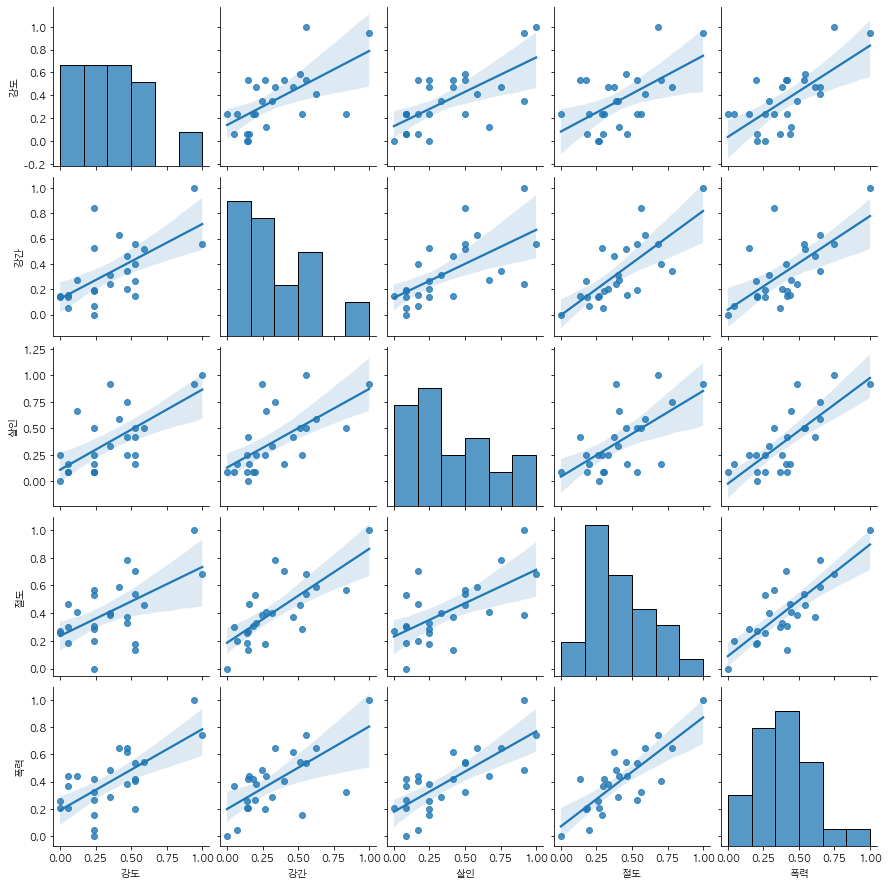

In [370]:
# 강도, 강간, 살인, 절도, 폭력 건수에 대한 상관관계 시각화
sns.pairplot(
    crime_anal_norm,
    vars=['강도', '강간', '살인', '절도', '폭력' ],
    kind='reg'
)
plt.show()

> 5대범죄 모두 양의 상관관계    
> 예를 들어 강도의 건수가 많아지면 폭력과 살인의 발생건수도 많아진다.

### CCTV와 살인, 강도에 대한 그래프

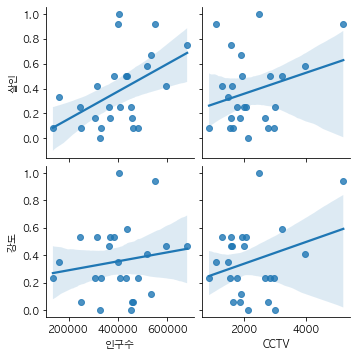

In [371]:
sns.pairplot(
    crime_anal_norm,
    x_vars= ['인구수','CCTV'],
    y_vars= ['살인','강도'],
    kind='reg',
)
plt.show()

> 인구수가 증가하면 강도와 살인 발생수도 증가한다.  
> 특히, 강도 보다는 살인 발생수가 훨씬 많이 증가한다.   
> CCTV와 살인은 상관관계가 있으나 강도에 비해 낮게 보인다.  
> 따라서 CCTV가 없을때 살인 사건 발생수가 증가한다.

### 인구수 , CCTV와 살인 검거율, 폭력 검거율을 회귀선으로 확인수 Comment

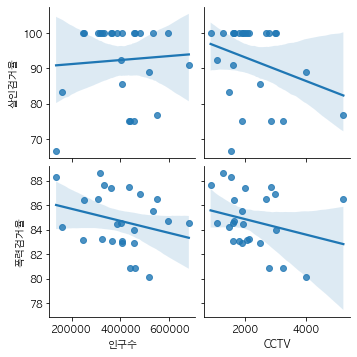

In [372]:
sns.pairplot(
    crime_anal_norm,
    x_vars= ['인구수','CCTV'],
    y_vars= ['살인검거율','폭력검거율'],
    kind='reg',
)
plt.show()

살인 검거율은 인구수가 많아질 수록 높아지는 검거율을 보이긴 하지만 낮은 인구수에도 거의 일정하게 높은 검거율을 보인다.    
폭력 검거율은 인구수가 많아질 수록 낮아지는 경향을 보인다.    
살인 검거율이 낮을 수록 CCTV 댓수가 많다. 그와 같이 폭력 검거율 또한 낮을 수록 CCTV가 많은 경향을 보이고 있다.    

인구수가 증가할때 살인검거율도 증가하지만 증가량이 미미하다.    
인구수가 증가할떄 폭행검거율이 낮아진다.    
살인검거율이 낮을떄 CCTV 댓수가 증가한다.   
폭행검거율이 낮을떄 CCTV 댓수가 증가한다.   

> CCTV가 적을때 범죄건수가 많기 때문에 검거율이 높다, CCTV가 많을 떄는 범죄 건수가 별로 없기 때문에 회귀선이 낮게 나온다.     
> CCTV의 구분이 없기 때문에 과속방지카메라도 CCTV에 포함되어있어 과속방지 카메라가 많은 경우가 있을 수 있다. (추측)   

---
### heatmap을 이용한 전체 검거율 확인

In [373]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,368.622261


In [374]:
# 검거 최대값 가져오기
tmp_max = crime_anal_norm['검거'].max()
# 검거의 최대값을 100으로 설정하고 검거율 계산하기
crime_anal_norm['검거'] = crime_anal_norm['검거'] / 100 
# 검거 컬럼은 검거율들의 합. tmp_max or 100 (검거율의 최대값) 으로 나눠준다. 

# 검거율을 기준으로 정렬하기
crime_anal_norm_sort = crime_anal_norm.sort_values(by = '검거' , ascending = False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,333495,858,0.318627,4.325932
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,251370,1634,0.666924,4.239289
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,595703,1617,2.333944,4.177674
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,365990,1581,2.204979,4.169152
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,362793,2003,1.633921,4.128853


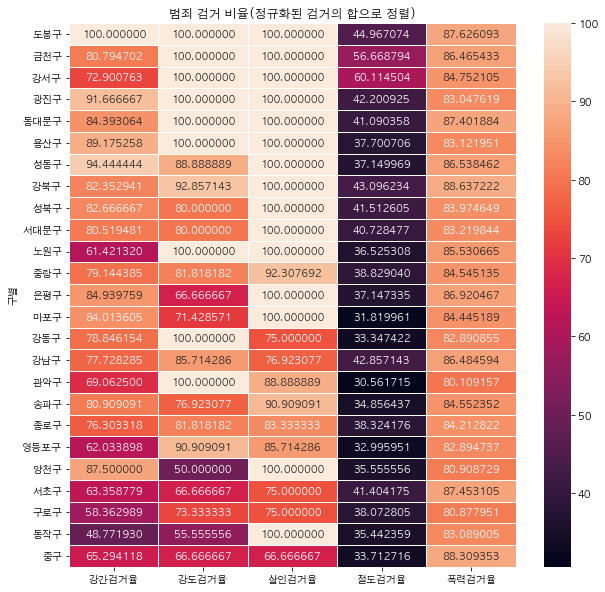

In [375]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col],
    annot= True,
    fmt='f', # float
    linewidths=0.5,
)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()

> 절도 검거율이 다른 검거율에 비해 매우 저조하다.   
> 검거율이 우수한 지역은 도봉구, 광진구, 성동구, 용산구 ( 강간, 강도, 살인)

### heatmap 을 이용한 범죄 발생율 확인

In [376]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,4.857843,3.697074
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,1.286607,3.700844
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,1.641616,4.069435
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,2.333944,4.177674
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,2.860342,3.686223


In [377]:
# 범죄 최대값 가져오기
tmp_max = crime_anal_norm['범죄'].max()
# 범죄의 최대값을 100으로 설정하고 범죄율 계산하기
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
# 정규화 한 값 5개의 합이기 때문에 그냥 5로만 나눠준다.

# 범죄율을 기준으로 정렬하기
crime_anal_norm_sort2 = crime_anal_norm.sort_values(by = '범죄' , ascending = False)
crime_anal_norm_sort2.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.971569,3.697074
영등포구,0.556196,1.000000,1.000000,0.682095,0.745442,62.033898,90.909091,85.714286,32.995951,82.894737,404766,2495,0.796747,3.545480
송파구,0.340058,0.470588,0.750000,0.780768,0.646407,80.909091,76.923077,90.909091,34.856437,84.552352,680883,1586,0.597564,3.681500
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.572068,3.686223
마포구,0.553314,0.529412,0.500000,0.535343,0.534859,84.013605,71.428571,100.000000,31.819961,84.445189,386086,1935,0.530585,3.717073


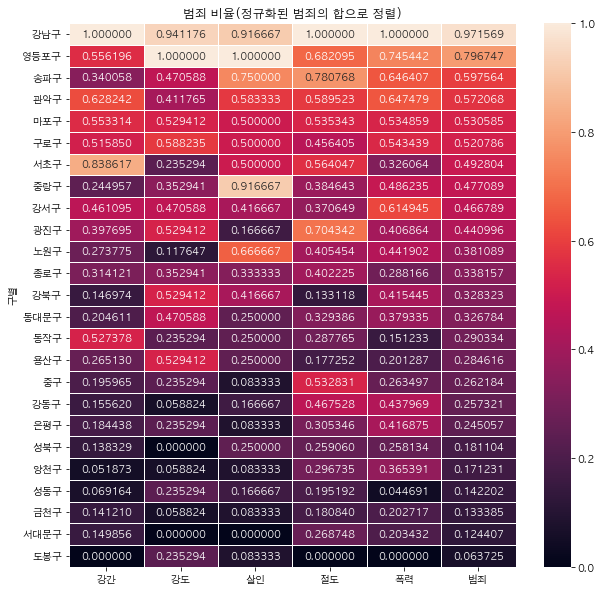

In [378]:
target_col = ['강간','강도','살인','절도','폭력','범죄']
plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort2[target_col],
    annot= True,
    fmt='f', # float
    linewidths=0.5,
)
plt.title('범죄 비율(정규화된 범죄의 합으로 정렬)')
plt.show()

> 분석 포트폴리오에는 히트맵이 있어야 한다..

In [379]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.971569,3.697074
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,0.257321,3.700844
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,0.328323,4.069435
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,0.466789,4.177674
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.572068,3.686223
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,365990,1581,0.440996,4.169152
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,438308,3227,0.520786,3.256471
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,251370,1634,0.133385,4.239289
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,535495,1906,0.381089,3.834773


In [380]:
# 저장하기
crime_anal_norm.to_csv('../Data/seoul_crime_norm.csv')

# 지도출력

In [381]:
import json
import folium

In [382]:
geo_path = '../Data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf8'))

In [385]:
# 살인 건수를 서울시 지도에 출력
map = folium.Map(
    location=[37.5502 , 126.982],
    zoom_start=10.5,
    tiles='cartodbpositron'
)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns=[crime_anal_norm.index, '살인'],
    fill_color='PuRd',
    key_on='feature.id',
).add_to(map)

map

In [386]:
# 강간 건수를 서울시 지도에 출력
map = folium.Map(
    location=[37.5502 , 126.982],
    zoom_start=10.5,
    tiles='cartodbpositron'
)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns=[crime_anal_norm.index, '강간'],
    fill_color='PuRd',
    key_on='feature.id',
).add_to(map)

map

In [387]:
# 강간 건수를 서울시 지도에 출력
map = folium.Map(
    location=[37.5502 , 126.982],
    zoom_start=10.5,
    tiles='cartodbpositron'
)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns=[crime_anal_norm.index, '폭력'],
    fill_color='PuRd',
    key_on='feature.id',
).add_to(map)

map

In [388]:
# 강간 건수를 서울시 지도에 출력
map = folium.Map(
    location=[37.5502 , 126.982],
    zoom_start=10.5,
    tiles='cartodbpositron'
)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns=[crime_anal_norm.index, '강도'],
    fill_color='PuRd',
    key_on='feature.id',
).add_to(map)

map

In [389]:
# 강간 건수를 서울시 지도에 출력
map = folium.Map(
    location=[37.5502 , 126.982],
    zoom_start=10.5,
    tiles='cartodbpositron'
)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns=[crime_anal_norm.index, '강간검거율'],
    fill_color='PuRd',
    key_on='feature.id',
).add_to(map)

map

In [393]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,549898,5221,0.971569,3.697074
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,457042,1879,0.257321,3.700844
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,316750,1265,0.328323,4.069435
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,595703,1617,0.466789,4.177674
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,516662,3985,0.572068,3.686223


In [397]:
# 인구대비 범죄율 지도 출력 : 범죄 / 인구수 * 100000 # 10만명 당 범죄 발생 비율
crime_anal_norm['인구대비범죄율']  = crime_anal_norm.범죄 / crime_anal_norm.인구수 * 100000


In [398]:
# 강간 건수를 서울시 지도에 출력
map = folium.Map(
    location=[37.5502 , 126.982],
    zoom_start=10.5,
    tiles='cartodbpositron'
)
folium.Choropleth(
    geo_data=geo_str,
    data=crime_anal_norm,
    columns=[crime_anal_norm.index, '인구대비범죄율'],
    fill_color='PuRd',
    key_on='feature.id',
).add_to(map)

map

---